In [29]:
import sys
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

sys.path.insert(0, "../0.data-download/scripts/")

from data_loader import load_data

In [30]:
data_directory = "../0.data-download/data/"
dfs = load_data(data_directory, adult_or_pediatric = "all")

In [32]:
dependency_df = dfs[1]

In [40]:

variance = dependency_df.var()

variance_list = variance.tolist()
column_names = ['variance']

variance_df = pd.DataFrame(variance, columns= column_names)
variance_df = variance_df.sort_index(ascending=True)
variance_df = variance_df.reset_index()
variance_df


/tmp/ipykernel_800399/1116578451.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = dependency_df.var()


,index,variance
0,A1BG (1),0.003763
1,A1CF (29974),0.004006
2,A2M (2),0.000821
3,A2ML1 (144568),0.001083
4,A3GALT2 (127550),0.006689
...,...,...
17381,ZYG11A (440590),0.002252
17382,ZYG11B (79699),0.005868
17383,ZYX (7791),0.003669
17384,ZZEF1 (23140),0.008195


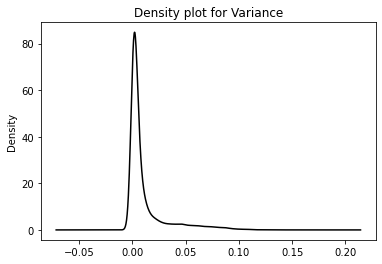

In [41]:
variance_df.variance.plot.density(color='black')
plt.title('Density plot for Variance')
plt.show()

In [ ]:
# T-test for Adult vs Pediatric data sets 
